In [1]:
#import statements
import numpy as np
import tensorflow as tf
import keras
from matplotlib import pyplot as plt
from scipy import stats
from numpy.random import randn
from numpy.random import seed
from numpy import cov

import gzip
import math
import tensorflow.keras.layers as layers
import pandas as pd
import IPython.display as dis
from PIL import Image

#learned no real difference using norm or raw data.
#there is between .91 and .99 coorelation for the vairous DNS truths (biggest influence is log/no log)

#raw channels most related to DNB (all .7 or higher)
#then some BTDS GT0.3 --> 1213,1214,1415,1516 relationships ( positive or negative)
#many BTDs less than 0.3

#moving forward to save calculations and data array space 5 channels, 4 BTDs, FMN and logFMN variables    


In [9]:
#load data
case=np.load('../../YOONGIN/fullcase_normalized.npz') #full march data 
case.files

['latitude',
 'longitude',
 'DNB',
 'M12',
 'M13',
 'M14',
 'M15',
 'M16',
 'channels',
 'samples',
 'M12norm',
 'M13norm',
 'M14norm',
 'M15norm',
 'M16norm',
 'BTD1213',
 'BTD1213norm',
 'BTD1214',
 'BTD1214norm',
 'BTD1215',
 'BTD1215norm',
 'BTD1216',
 'BTD1216norm',
 'BTD1312',
 'BTD1312norm',
 'BTD1314',
 'BTD1314norm',
 'BTD1315',
 'BTD1315norm',
 'BTD1316',
 'BTD1316norm',
 'BTD1412',
 'BTD1412norm',
 'BTD1413',
 'BTD1413norm',
 'BTD1415',
 'BTD1415norm',
 'BTD1416',
 'BTD1416norm',
 'BTD1512',
 'BTD1512norm',
 'BTD1513',
 'BTD1513norm',
 'BTD1514',
 'BTD1514norm',
 'BTD1516',
 'BTD1516norm',
 'BTD1612',
 'BTD1612norm',
 'BTD1613',
 'BTD1613norm',
 'BTD1614',
 'BTD1614norm',
 'BTD1615',
 'BTD1615norm',
 'DNBfix',
 'DNB_norm',
 'DNB_full_moon_norm',
 'DNB_log_norm',
 'DNB_log_full_moon_norm',
 'DNB_log_Miller_full_moon']

In [10]:
case['latitude'].shape

(93, 3056, 3759)

In [11]:
case['samples']

array(['d20190319_t0902488', 'd20190319_t0908305', 'd20190319_t0914121',
       'd20190319_t0919537', 'd20190319_t0954011', 'd20190319_t0959442',
       'd20190319_t1005254', 'd20190319_t1011066', 'd20190319_t1045144',
       'd20190319_t1050561', 'd20190319_t1056377', 'd20190319_t1102193',
       'd20190319_t1136270', 'd20190319_t1142082', 'd20190319_t1147495',
       'd20190319_t1153307', 'd20190319_t1227400', 'd20190319_t1233217',
       'd20190319_t1239033', 'd20190319_t1244431', 'd20190319_t1318529',
       'd20190319_t1324341', 'd20190319_t1330153', 'd20190319_t1335566',
       'd20190319_t1404240', 'd20190319_t1410056', 'd20190319_t1415455',
       'd20190319_t1421271', 'd20190319_t1427087', 'd20190320_t0856418',
       'd20190320_t0902234', 'd20190320_t0936318', 'd20190320_t0942130',
       'd20190320_t0947543', 'd20190320_t0953355', 'd20190320_t1027442',
       'd20190320_t1033258', 'd20190320_t1039074', 'd20190320_t1044490',
       'd20190320_t1118576', 'd20190320_t1124389', 

In [12]:
allchannels=list(case['channels'])[3:]
#rawchannels = list(case'channels')
print (allchannels)#,rawchannels)

['M12', 'M13', 'M14', 'M15', 'M16', 'M12norm', 'M13norm', 'M14norm', 'M15norm', 'M16norm', 'BTD1213', 'BTD1213norm', 'BTD1214', 'BTD1214norm', 'BTD1215', 'BTD1215norm', 'BTD1216', 'BTD1216norm', 'BTD1312', 'BTD1312norm', 'BTD1314', 'BTD1314norm', 'BTD1315', 'BTD1315norm', 'BTD1316', 'BTD1316norm', 'BTD1412', 'BTD1412norm', 'BTD1413', 'BTD1413norm', 'BTD1415', 'BTD1415norm', 'BTD1416', 'BTD1416norm', 'BTD1512', 'BTD1512norm', 'BTD1513', 'BTD1513norm', 'BTD1514', 'BTD1514norm', 'BTD1516', 'BTD1516norm', 'BTD1612', 'BTD1612norm', 'BTD1613', 'BTD1613norm', 'BTD1614', 'BTD1614norm', 'BTD1615', 'BTD1615norm', 'DNBfix', 'DNB_norm', 'DNB_full_moon_norm', 'DNB_log_norm', 'DNB_log_full_moon_norm', 'DNB_log_Miller_full_moon']


In [13]:
normchannels = [s for s in allchannels if s.endswith('norm')]
print(normchannels)

['M12norm', 'M13norm', 'M14norm', 'M15norm', 'M16norm', 'BTD1213norm', 'BTD1214norm', 'BTD1215norm', 'BTD1216norm', 'BTD1312norm', 'BTD1314norm', 'BTD1315norm', 'BTD1316norm', 'BTD1412norm', 'BTD1413norm', 'BTD1415norm', 'BTD1416norm', 'BTD1512norm', 'BTD1513norm', 'BTD1514norm', 'BTD1516norm', 'BTD1612norm', 'BTD1613norm', 'BTD1614norm', 'BTD1615norm', 'DNB_norm', 'DNB_full_moon_norm', 'DNB_log_norm', 'DNB_log_full_moon_norm']


In [14]:
rawchannels = [s for s in allchannels if not s.endswith('norm')]
print(rawchannels)

['M12', 'M13', 'M14', 'M15', 'M16', 'BTD1213', 'BTD1214', 'BTD1215', 'BTD1216', 'BTD1312', 'BTD1314', 'BTD1315', 'BTD1316', 'BTD1412', 'BTD1413', 'BTD1415', 'BTD1416', 'BTD1512', 'BTD1513', 'BTD1514', 'BTD1516', 'BTD1612', 'BTD1613', 'BTD1614', 'BTD1615', 'DNBfix', 'DNB_log_Miller_full_moon']


In [15]:
normcase = np.stack([case[a].flatten() for a in normchannels])
normcase.shape

(29, 1068337872)

In [16]:
normcovar = np.corrcoef(normcase)
normcovar.shape

(29, 29)

In [17]:
print(normcovar)

[[ 1.00000000e+00  9.96189062e-01  9.72237002e-01  9.64992210e-01
   9.50877385e-01  2.63315626e-01  9.68097390e-02 -9.26214367e-02
   7.85720030e-06 -2.63315626e-01 -1.25022701e-02 -2.01368697e-01
  -8.24118865e-02 -9.68097390e-02  1.25022701e-02 -5.85778115e-01
  -1.87510072e-01  9.26214367e-02  2.01368697e-01  5.85778115e-01
   3.78074011e-01 -7.85721237e-06  8.24118865e-02  1.87510072e-01
  -3.78074011e-01  5.32940957e-01  6.53646170e-01  7.04754426e-01
   7.05609143e-01]
 [ 9.96189062e-01  1.00000000e+00  9.77493561e-01  9.70118689e-01
   9.57518633e-01  1.84790291e-01  4.81182295e-02 -1.33289110e-01
  -3.93446842e-02 -1.84790291e-01 -3.27239284e-02 -2.17340531e-01
  -1.01301238e-01 -4.81182295e-02  3.27239284e-02 -5.87690021e-01
  -2.02663990e-01  1.33289110e-01  2.17340531e-01  5.87690021e-01
   3.54071244e-01  3.93446842e-02  1.01301238e-01  2.02663990e-01
  -3.54071244e-01  5.17199082e-01  6.33911056e-01  6.89506036e-01
   6.90327653e-01]
 [ 9.72237002e-01  9.77493561e-01  1.0

In [ ]:
DNBs = normcovar[-4:,-4:]
DNBs.shape

In [ ]:
print(DNBs)

In [ ]:
channelRs = normcovar[:5,:5]
print(channelRs)

In [ ]:
BTDs =normcovar[5:-4,5:-4]
print(BTDs)

[Text(0.5, 0, '0'),
 Text(2.5, 0, '2'),
 Text(4.5, 0, '4'),
 Text(6.5, 0, '6'),
 Text(8.5, 0, '8'),
 Text(10.5, 0, '10'),
 Text(12.5, 0, '12'),
 Text(14.5, 0, '14'),
 Text(16.5, 0, '16'),
 Text(18.5, 0, '18'),
 Text(20.5, 0, '20'),
 Text(22.5, 0, '22'),
 Text(24.5, 0, '24'),
 Text(26.5, 0, '26'),
 Text(28.5, 0, '28')]

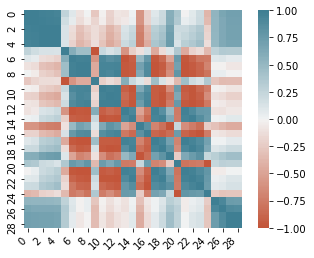

In [18]:
import seaborn as sns
ax = sns.heatmap(
    normcovar, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
rawcase = np.stack([case[a].flatten() for a in rawchannels])
rawcase.shape

In [ ]:
rawcovar = np.corrcoef(rawcase)
rawcovar.shape

In [ ]:
print(rawcovar)

In [ ]:
sizescale = 800
fig, ax = plt.subplots()
im = ax.imshow(rawcovar)
im.set_clim(-1, 1)
ax.grid(False)
#ax.xaxis.set(ticklabels=(rawchannels))
#ax.yaxis.set(ticklabels=(rawchannels))
#ax.set_ylim(2.5, -0.5)
#for i in range(57):
 #   for j in range(57):
  #      ax.text(j, i, covar[i, j], ha='center', va='center',
   #             color='r')
cbar = ax.figure.colorbar(im, ax=ax, format='% .3f')
plt.show()


In [ ]:
import seaborn as sns
ax = sns.heatmap(
    rawcovar, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [ ]:
#now explore the DNBdata some ( ie distribution, what valeu is open ocean, etc)
#load the 2 truths
DNB_FMN = case['DNB_full_moon_norm']
DNM_LFMN = case['DNB_log_full_moon_norm']

In [ ]:
print(DNB_FMN.min(),DNB_FMN.max(),DNB_FMN.std())

In [ ]:
DNB_FMN.shape, DNM_LFMN.shape

In [ ]:
#plot histogram/pdf of data distrubution
x = DNB_FMN.flatten()
y = DNM_LFMN.flatten()
xinc =0.005
xbins = np.arange(-1, 2, xinc)

hx = np.histogram(x,xbins)
hy = np.histogram(y,xbins)

plt.figure()

xvals = hx[1][:-1]
fvalsx = hx[0].astype(float)/(np.size(x)*xinc)
fvalsy = hy[0].astype(float)/(np.size(y)*xinc)

plt.plot(xvals+xinc/2,fvalsx,'r', label = 'x',linewidth=1.5)
plt.plot(xvals+xinc/2,fvalsy,'k', label = 'y',linewidth=1.5)
plt.xlabel('value')
plt.ylabel('density')
plt.legend()

plt.show()


In [19]:
#can we pull out all the sets that have DNB_LFMN values LT 0.5 
#the rerun the coor matricies as well as data setinto ML training?
CLOUD = case['DNB_log_full_moon_norm'].flatten() >0.5
percent = np.count_nonzero(CLOUD)/len(CLOUD)#percent above the threshold given
print(percent)

0.6722749448687522


In [20]:
cloudnorm = normcase[:,CLOUD]
#cloudraw = rawcase[:,CLOUD]

In [21]:
cloudnorm.shape, #cloudraw.shape

((29, 718216784),)

In [22]:
CNcovar = np.corrcoef(cloudnorm)
CNcovar.shape

(29, 29)

In [43]:
NCarray = np.array(normchannels).reshape(-1,1)

In [44]:
np.set_printoptions(precision=3, suppress = True)
cn = CNcovar[:,-1].reshape(-1,1)
no = normcovar[:,-1].reshape(-1,1)
x = np.hstack((NCarray, cn,no, cn-no))
x

array([['M12norm', '0.5849071427303336', '0.705609142954982',
        '-0.12070200022464839'],
       ['M13norm', '0.5626621138723742', '0.6903276526312446',
        '-0.12766553875887043'],
       ['M14norm', '0.5396462059008384', '0.6860763506211596',
        '-0.14643014472032112'],
       ['M15norm', '0.5294775575230785', '0.6830972520865836',
        '-0.1536196945635051'],
       ['M16norm', '0.509973692842277', '0.6722839271081383',
        '-0.16231023426586133'],
       ['BTD1213norm', '0.3091065226180912', '0.3291123146885461',
        '-0.020005792070454942'],
       ['BTD1214norm', '0.17489599351966897', '0.06538277111317765',
        '0.10951322240649132'],
       ['BTD1215norm', '0.08325549086815527', '-0.07640881979536893',
        '0.1596643106635242'],
       ['BTD1216norm', '0.13180597803120633', '-0.006377280418759249',
        '0.1381832584499656'],
       ['BTD1312norm', '-0.3091065222997835', '-0.32911231456681184',
        '0.02000579226702831'],
       ['BTD1314

[Text(0.5, 0, '0'),
 Text(2.5, 0, '2'),
 Text(4.5, 0, '4'),
 Text(6.5, 0, '6'),
 Text(8.5, 0, '8'),
 Text(10.5, 0, '10'),
 Text(12.5, 0, '12'),
 Text(14.5, 0, '14'),
 Text(16.5, 0, '16'),
 Text(18.5, 0, '18'),
 Text(20.5, 0, '20'),
 Text(22.5, 0, '22'),
 Text(24.5, 0, '24'),
 Text(26.5, 0, '26'),
 Text(28.5, 0, '28')]

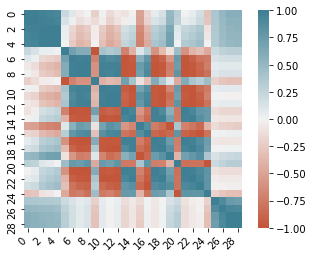

In [23]:
import seaborn as sns
ax = sns.heatmap(
    CNcovar, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')

In [25]:
diff=normcovar-CNcovar

In [26]:
diff.shape

(29, 29)

[Text(0.5, 0, '0'),
 Text(2.5, 0, '2'),
 Text(4.5, 0, '4'),
 Text(6.5, 0, '6'),
 Text(8.5, 0, '8'),
 Text(10.5, 0, '10'),
 Text(12.5, 0, '12'),
 Text(14.5, 0, '14'),
 Text(16.5, 0, '16'),
 Text(18.5, 0, '18'),
 Text(20.5, 0, '20'),
 Text(22.5, 0, '22'),
 Text(24.5, 0, '24'),
 Text(26.5, 0, '26'),
 Text(28.5, 0, '28')]

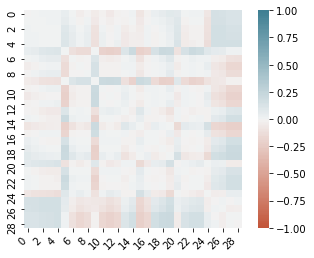

In [27]:
ax = sns.heatmap(
    diff, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right')